In [225]:
from skimage import data, feature, transform
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from itertools import chain
from skimage.io import imread
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.image import PatchExtractor
import numpy as np 

In [143]:
human_faces = fetch_lfw_people()
positive_images = human_faces.images[:10000]
positive_images.shape

(10000, 62, 47)

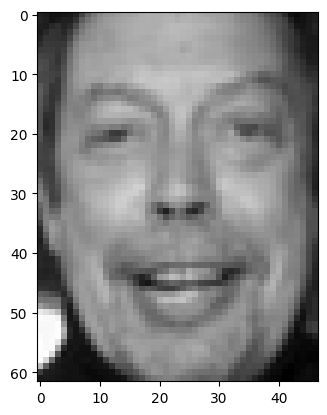

In [145]:
plt.imshow(positive_images[0], cmap = "gray")

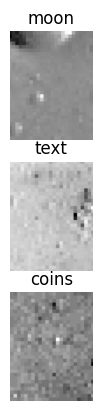

In [147]:
'''
getattr(object, name)
getattr(obj, "name") -> obj.name
'''

non_face_topics = ["moon", "text", "coins"]

negative_samples = [getattr(data, name)() for name in non_face_topics]
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.imshow(negative_images[i], cmap = "gray")
    plt.title(non_face_topics[i])
    plt.axis("off")

In [149]:
def generate_random_samples(image, 
                            num_of_generated_image = 100, 
                            patch_size = positive_images[0].shape): # (62, 47)
    
    extractor = PatchExtractor(patch_size = patch_size, 
                               max_patches = num_of_generated_image,
                               random_state = 42)
    
    patches = extractor.transform((image[np.newaxis])) # np.newaxis -> like torch.unsqueeze 
    
    return patches

In [151]:
# vstack -> vertical stack 
negative_images = np.vstack([generate_random_samples(image = sample, num_of_generated_image = 1000, patch_size = (62, 47)) for sample in negative_samples])

In [153]:
negative_images.shape

(3000, 62, 47)

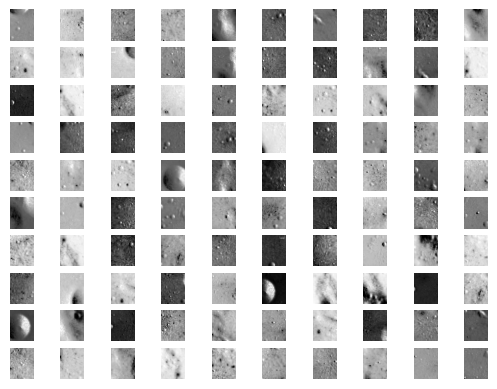

In [155]:
'''
axes = [
    [ax00, ax01, ax02, ..., ax09],
    [ax10, ax11, ax12, ..., ax19],
    ...
    [ax90, ax91, ax92, ..., ax99]
]

axes.flat = [ax00, ax01, ax02, ..., ax99]

example:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x)
array([1, 2, 3, 4, 5, 6])

'''
fig, axes = plt.subplots(10, 10)
for i, axis in enumerate(axes.flat):
    axis.imshow(negative_images[i], cmap = "gray")
    axis.axis("off")

In [157]:
X_train = np.array([feature.hog(image) for image in chain(positive_images, negative_images)])

In [203]:
y_train = np.zeros(X_train.shape[0]) # X_train.shape[0] -> 13000

In [205]:
y_train[:positive_images.shape[0]] = 1 # :positive_images.shape[0] -> after 10000 is equal to 1

In [227]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [256]:
# labels : 0 and 1
# 1 -> face, 0 -> non-face

(-0.5, 46.5, 61.5, -0.5)

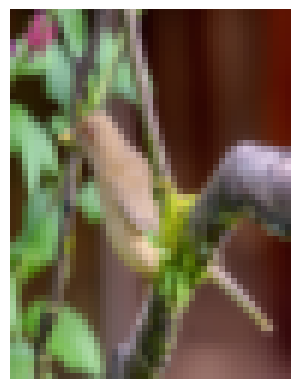

In [237]:
test_image = imread('bird.jpg')
test_image = transform.resize(test_image, positive_images[0].shape)
plt.imshow(test_image, cmap = "gray")
plt.axis(False)

In [243]:
test_image_hog = np.array([feature.hog(test_image, channel_axis = -1)])
prediction = svm.predict(test_image_hog)
print(f"Prediction made by SVM : {prediction}")

Prediction made by SVM : [0.]


(-0.5, 46.5, 61.5, -0.5)

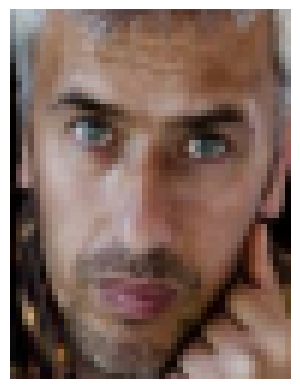

In [247]:
test_image_2 = imread("male_face.png")
test_image_2 = transform.resize(test_image_2, positive_images[0].shape)
plt.imshow(test_image_2)
plt.axis("off")

In [249]:
test_image_2_hog = np.array([feature.hog(test_image_2, channel_axis = -1)])
prediction_2 =svm.predict(test_image_2_hog)
print(f"Prediction made by SVM: {prediction_2}")

Prediction made by SVM: [1.]
